In [1]:
#example 7-1

from sklearn.metrics.pairwise import euclidean_distances

#กำหนดจุดพิกัดแบบลิสต์ 2 มิติ
a = [[3, 4]]    #จุด a
b = [[8, 13]]   #จุด b
c = [[14, 5]]   #จุด c

print('dist_ab =', euclidean_distances(a, b))  #ระยะห่างระหว่างจุด a และ b
print('dist_bc =', euclidean_distances(b, c))  #ระยะห่างระหว่างจุด b และ c
print('dist_ac =', euclidean_distances(a, c))  #ระยะห่างระหว่างจุด a และ c

dist_ab = [[10.29563014]]
dist_bc = [[10.]]
dist_ac = [[11.04536102]]


In [2]:
#example 7-2

from sklearn.metrics.pairwise import euclidean_distances

x = [[3, 3], [5, 8], [4, 7], [6, 4], [5, 9], 
     [7, 5], [6, 9], [4, 5], [3, 8], [2, 6]]

y = ['A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A']

x_predict = [[5, 5]]

distances = euclidean_distances(x, x_predict)

print('id\t distances\t class')

for (i, d) in enumerate(distances): 
    print(i + 1, '\t', '{:.2f}'.format(d[0]), '\t\t', y[i])


id	 distances	 class
1 	 2.83 		 A
2 	 3.00 		 B
3 	 2.24 		 B
4 	 1.41 		 A
5 	 4.00 		 B
6 	 2.00 		 B
7 	 4.12 		 B
8 	 1.00 		 A
9 	 3.61 		 B
10 	 3.16 		 A


In [3]:
#example 7-3

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_excel(r'data\shirt_size.xlsx')
with pd.option_context('display.max_rows', 8): display(df)

x = df[['Height_cms', 'Weight_kgs']]
y = df['T_Shirt_Size']
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x, y)

x_pred = [[161, 61]]
y_pred = model.predict(x_pred)

h = x_pred[0][0]
w = x_pred[0][1]
s = y_pred[0]

print('K =', k)
print(f'Height: {h}, Weight: {w}, T-Shirt Size => {s}')
print('Accuracy:', '{:.2f}'.format(model.score(x, y)))


,Height_cms,Weight_kgs,T_Shirt_Size
0,158,58,M
1,158,59,M
2,160,64,L
3,163,64,L
...,...,...,...
14,170,63,L
15,163,61,M
16,170,64,L
17,170,68,L


K = 5
Height: 161, Weight: 61, T-Shirt Size => M
Accuracy: 0.89


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


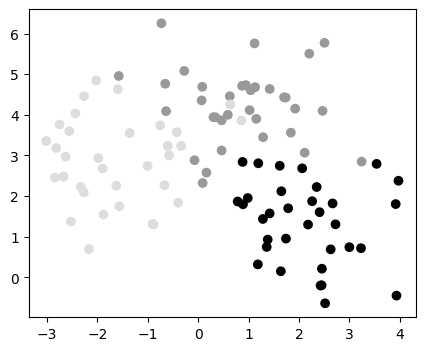

K: 20
Accuracy: 0.84


In [5]:
#example 7-4

from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

x, y = make_blobs(n_samples=100, centers=3, random_state=0)

df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y
#with pd.option_context('display.max_rows', 6): display(df)

plt.figure(figsize=(5, 4))
colors = np.array(['#999', '000', '#ddd'])
plt.scatter(df['x1'], df['x2'], color=colors[df['y']])
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

k = 20
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

print('K:', k)
print('Accuracy:', '{:.2f}'.format(model.score(x_test, y_test)))

In [6]:
#example 7-5

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_excel(r'data\shirt_size.xlsx')
#with pd.option_context('display.max_rows', 8): display(df)

x = df[['Height_cms', 'Weight_kgs']]

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['T_Shirt_Size']

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x, y)

x_pred = [[161, 61]]
x_pred_sc = scaler.transform(x_pred)
y_pred = model.predict(x_pred_sc)

h = x_pred[0][0]
w = x_pred[0][1]
s = y_pred[0]

print('K =', k)
print(f'Height: {h}, Weight: {w}, T-Shirt Size => {s}')
print('Accuracy:', '{:.2f}'.format(model.score(x, y)))


K = 5
Height: 161, Weight: 61, T-Shirt Size => M
Accuracy: 1.00


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
#example 7-6

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_excel(r'data\fruit_data.xlsx')
with pd.option_context('display.max_rows', 8): display(df)

x = df[['width', 'height', 'mass', 'color_score']]
y = df['fruit_name']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#scaling after splitting
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

x_pred = [[7.5, 7.5, 175, 0.75]]
x_pred_sc = scaler.transform(x_pred)
y_pred = model.predict(x_pred_sc)

w = x_pred[0][0]
h = x_pred[0][1]
m = x_pred[0][2]
c = x_pred[0][3]
f = y_pred[0]

print('K =', k)
print('Prediction:')
print(f'width: {w}, height: {h}, mass: {m}, ', end='')
print(f'color score {c} => fruit: {f}')
print()
print('Accuracy:', '{:.2f}'.format(model.score(x_test, y_test)))


,width,height,mass,color_score,fruit_name
0,8.4,7.3,192,0.55,apple
1,6.2,4.7,86,0.80,mandarin
2,6.0,4.6,84,0.79,mandarin
3,8.0,6.8,180,0.59,apple
...,...,...,...,...,...
55,6.1,8.1,118,0.70,lemon
56,7.6,8.2,180,0.79,orange
57,7.2,7.2,154,0.82,orange
58,7.2,10.3,194,0.70,lemon


K = 5
Prediction:
width: 7.5, height: 7.5, mass: 175, color score 0.75 => fruit: orange

Accuracy: 0.93


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
